Importamos librerías

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
import time
import json
from IPython.display import display
from time import strftime, gmtime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
path = r"C:\Users\slopezgu\OneDrive - Capgemini\Desktop\Survey\responses.csv"
df = pd.read_csv(path, encoding='latin-1', on_bad_lines='skip', engine = 'python', delimiter=",")
print(df.shape)
df.head()

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [4]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [5]:

pathinfo = r"C:\Users\slopezgu\OneDrive - Capgemini\Desktop\Survey\columns.csv"
info = pd.read_csv(pathinfo, encoding='latin-1', on_bad_lines='skip', engine = 'python', delimiter=",")
column_types = df.dtypes
info = pd.merge(column_types.rename('type'), info, left_index=True, right_on='short')
info.head(20)

,type,original,short
0,float64,I enjoy listening to music.,Music
1,float64,I prefer.,Slow songs or fast songs
2,float64,"Dance, Disco, Funk",Dance
3,float64,Folk music,Folk
4,float64,Country,Country
5,float64,Classical,Classical music
6,float64,Musicals,Musical
7,float64,Pop,Pop
8,float64,Rock,Rock
9,float64,"Metal, Hard rock",Metal or Hardrock


In [6]:
info.loc[info.short == 'Music']

,type,original,short
0,float64,I enjoy listening to music.,Music


In [7]:
nulls = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
nulls['Percentage'] = df[df.columns[df.isnull().any()]].isnull().sum() / df.shape[0]
nulls = nulls.rename(columns={0: 'nulls'})
nulls.head()
nulls.loc[nulls.Percentage > 0.01]

,nulls,Percentage
Passive sport,15,0.014851
Height,20,0.019802
Weight,20,0.019802


Vemos que en muchos campos existe un único nulo. Comprobamos si es el mismo

In [8]:
df.loc[df['Opera'].isnull()]

df.loc[df['Height'].isnull()]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,...,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
51,5.0,3.0,3.0,3.0,1.0,4.0,3.0,5.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,5.0,3.0,2.0,5.0,2.0,4.0,5.0,5.0,4.0,...,3.0,3.0,5.0,2.0,4.0,4.0,4.0,less than an hour a day,5.0,4.0,1.0,2.0,2.0,2,3.0,19.0,NaN,75.0,1.0,female,right handed,secondary school,no,city,block of flats
137,5.0,3.0,4.0,3.0,3.0,5.0,5.0,5.0,4.0,2.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,2.0,2.0,2.0,1.0,3.0,4.0,3.0,1.0,...,3.0,2.0,4.0,3.0,1.0,5.0,4.0,few hours a day,4.0,4.0,1.0,2.0,1.0,1,4.0,NaN,NaN,NaN,NaN,NaN,right handed,primary school,yes,village,house/bungalow
142,5.0,4.0,4.0,1.0,3.0,2.0,2.0,4.0,4.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,4.0,1.0,2.0,4.0,4.0,4.0,...,1.0,3.0,4.0,5.0,2.0,2.0,2.0,most of the day,2.0,5.0,5.0,4.0,4.0,5,4.0,NaN,NaN,NaN,NaN,male,left handed,primary school,no,city,block of flats
209,5.0,2.0,4.0,3.0,3.0,4.0,3.0,2.0,5.0,4.0,3.0,5.0,4.0,5.0,4.0,2.0,4.0,2.0,2.0,5.0,1.0,4.0,5.0,3.0,3.0,...,2.0,4.0,4.0,2.0,2.0,2.0,4.0,few hours a day,5.0,1.0,3.0,4.0,2.0,4,5.0,21.0,NaN,NaN,1.0,male,right handed,secondary school,no,village,house/bungalow
276,5.0,4.0,5.0,3.0,5.0,2.0,2.0,5.0,5.0,4.0,3.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,5.0,4.0,4.0,5.0,4.0,5.0,...,1.0,4.0,5.0,4.0,4.0,3.0,NaN,few hours a day,1.0,3.0,3.0,5.0,5.0,1,5.0,21.0,NaN,NaN,2.0,female,right handed,college/bachelor degree,no,village,house/bungalow
462,4.0,3.0,3.0,1.0,2.0,3.0,1.0,3.0,5.0,1.0,4.0,3.0,3.0,3.0,3.0,4.0,2.0,3.0,1.0,4.0,2.0,3.0,5.0,4.0,3.0,...,2.0,3.0,4.0,1.0,2.0,4.0,3.0,few hours a day,4.0,1.0,3.0,3.0,2.0,2,3.0,NaN,NaN,60.0,2.0,female,right handed,college/bachelor degree,no,village,house/bungalow
495,5.0,3.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,2.0,4.0,2.0,2.0,1.0,5.0,5.0,2.0,2.0,1.0,5.0,1.0,5.0,4.0,3.0,3.0,...,4.0,3.0,3.0,2.0,4.0,4.0,3.0,most of the day,4.0,5.0,4.0,3.0,4.0,4,3.0,20.0,NaN,NaN,2.0,female,right handed,secondary school,no,city,block of flats
499,5.0,4.0,2.0,4.0,2.0,3.0,2.0,4.0,4.0,2.0,4.0,1.0,3.0,1.0,3.0,3.0,1.0,3.0,2.0,5.0,2.0,4.0,5.0,2.0,4.0,...,1.0,3.0,4.0,1.0,4.0,3.0,1.0,most of the day,5.0,1.0,1.0,5.0,2.0,2,1.0,22.0,NaN,76.0,3.0,male,right handed,secondary school,no,city,house/bungalow
551,5.0,4.0,3.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,5.0,4.0,3.0,...,4.0,3.0,3.0,2.0,5.0,4.0,2.0,less than an hour a day,2.0,3.0,2.0,3.0,3.0,2,5.0,16.0,NaN,NaN,NaN,female,right handed,secondary school,no,village,block of flats
552,5.0,3.0,2.0,3.0,1.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,4.0,5.0,3.0,5.0,5.0,2.0,2.0,5.0,2.0,4.0,5.0,5.0,1.0,...,3.0,3.0,3.0,5.0,5.0,2.0,2.0,few hours a day,3.0,3.0,3.0,5.0,4.0,2,3.0,19.0,NaN,50.0,3.0,female,right handed,secondary school,no,city,house/bungalow


No parece existir ningún patrón en la distribución de los nulos

In [60]:
dfFem = df[df['Gender'] == 'female']
dfmale = df[df['Gender'] == 'male']
print('Number of girls: {:.0f}'.format(len(dfFem.index)))
print('Number of boys: {:.0f}'.format(len(dfmale.index)))
print('Percentage of girls more than boys: {:.2f}'.format((len(dfFem.index)) / (len(dfmale.index)) -1))

Number of girls: 593
Number of boys: 411
Percentage of girls more than boys: 0.44


There is a significant greater ammount of girls than boys. 
Let´s check if women tend to respond less to the height and weight question

In [ ]:
print('Number of girls who omitted weight field: {:.0f}'.format(df[df['Gender'] == 'female']['Weight'].isnull().sum()))
print('Number of boys who omitted weight field: {:.0f}'.format(df[df['Gender'] == 'male']['Weight'].isnull().sum()))
print('Number of girls who omitted height field: {:.0f}'.format(df[df['Gender'] == 'female']['Height'].isnull().sum()))
print('Number of boys who omitted height field: {:.0f}'.format(df[df['Gender'] == 'male']['Height'].isnull().sum()))
print('Mean of girls who smoke: {:.2f}'.format(dfFem['Smoking'].mean()))
print('Mean of boys who smoke: {:.2f}'.format(dfmale['Smoking'].mean()))
print('Mean of girls who drink: {:.2f}'.format(dfFem['Alcohol'].mean()))
print('Mean of boys who drink: {:.2f}'.format(dfmale['Alcohol'].mean()))

C:\Users\slopezgu\AppData\Local\Temp\ipykernel_13472\2674691746.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var_of_int_ser=='male'].Age.dropna(),
C:\Users\slopezgu\AppData\Local\Temp\ipykernel_13472\2674691746.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var_of_int_ser=='fe

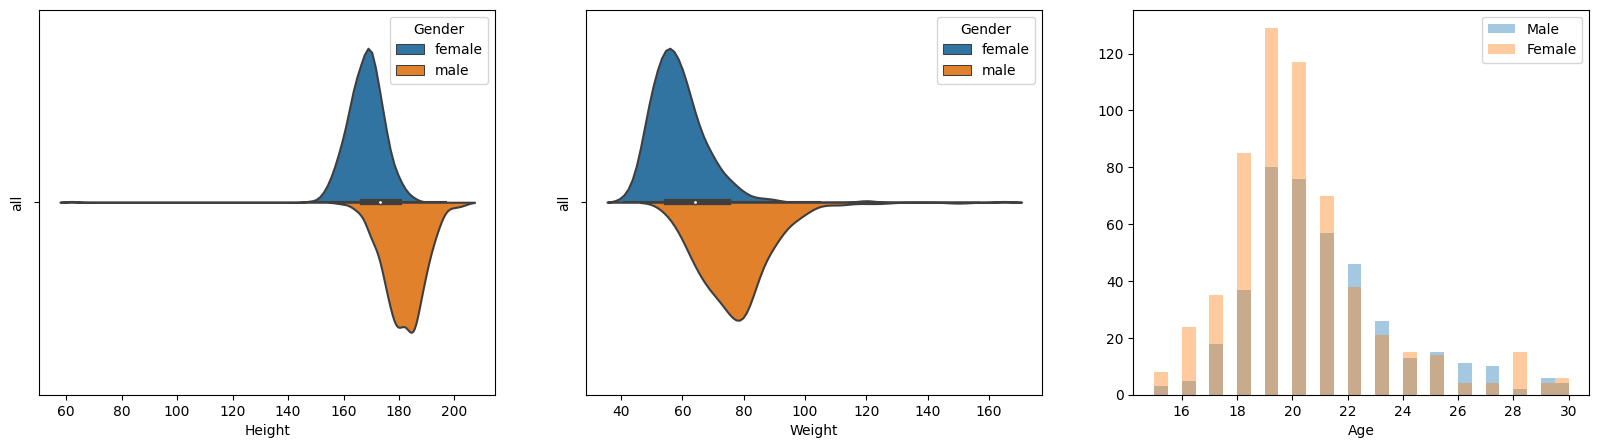

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
var_of_interest = 'Gender'
df["all"] = ""
sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=df, split=True, ax = ax[0]);
data = df.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=df, split=True, ax = ax[1]);

var_of_int_ser = df[var_of_interest]
sns.distplot(df[var_of_int_ser=='male'].Age.dropna(),
             label='Male', ax=ax[2], kde=False, bins=30);

sns.distplot(df[var_of_int_ser=='female'].Age.dropna(),
             label='Female', ax=ax[2], kde=False, bins=30);
ax[2].legend()


In [80]:
for column in df.columns:
    display(pd.crosstab(index=df[column], columns="% observations", normalize="columns"))


col_0,% observations
Music,
1.0,0.008937
2.0,0.010924
3.0,0.035750
4.0,0.128103
5.0,0.816286


col_0,% observations
Slow songs or fast songs,
1.0,0.022817
2.0,0.065476
3.0,0.575397
4.0,0.233135
5.0,0.103175


col_0,% observations
Dance,
1.0,0.093439
2.0,0.213718
3.0,0.319085
4.0,0.233598
5.0,0.140159


col_0,% observations
Folk,
1.0,0.288557
2.0,0.334328
3.0,0.233831
4.0,0.086567
5.0,0.056716


col_0,% observations
Country,
1.0,0.341294
2.0,0.344279
3.0,0.197015
4.0,0.084577
5.0,0.032836


col_0,% observations
Classical music,
1.0,0.137587
2.0,0.248255
3.0,0.280160
4.0,0.188435
5.0,0.145563


col_0,% observations
Musical,
1.0,0.193452
2.0,0.246032
3.0,0.280754
4.0,0.164683
5.0,0.115079


col_0,% observations
Pop,
1.0,0.059583
2.0,0.153923
3.0,0.258193
4.0,0.311817
5.0,0.216485


col_0,% observations
Rock,
1.0,0.054781
2.0,0.104582
3.0,0.206175
4.0,0.292829
5.0,0.341633


col_0,% observations
Metal or Hardrock,
1.0,0.381331
2.0,0.217478
3.0,0.162860
4.0,0.135055
5.0,0.103277


col_0,% observations
Punk,
1.0,0.318363
2.0,0.226547
3.0,0.219561
4.0,0.151697
5.0,0.083832


col_0,% observations
"Hiphop, Rap",
1.0,0.210736
2.0,0.204771
3.0,0.204771
4.0,0.222664
5.0,0.157058


col_0,% observations
"Reggae, Ska",
1.0,0.178465
2.0,0.251246
3.0,0.284148
4.0,0.194417
5.0,0.091725


col_0,% observations
"Swing, Jazz",
1.0,0.203187
2.0,0.230080
3.0,0.269920
4.0,0.197211
5.0,0.099602


col_0,% observations
Rock n roll,
1.0,0.115653
2.0,0.190429
3.0,0.297109
4.0,0.230309
5.0,0.166500


col_0,% observations
Alternative,
1.0,0.212363
2.0,0.219342
3.0,0.246261
4.0,0.171486
5.0,0.150548


col_0,% observations
Latino,
1.0,0.190619
2.0,0.249501
3.0,0.237525
4.0,0.171657
5.0,0.150699


col_0,% observations
"Techno, Trance",
1.0,0.378863
2.0,0.206381
3.0,0.193420
4.0,0.139581
5.0,0.081755


col_0,% observations
Opera,
1.0,0.385530
2.0,0.291378
3.0,0.173439
4.0,0.097126
5.0,0.052527


col_0,% observations
Movies,
1.0,0.002988
2.0,0.009960
3.0,0.074701
4.0,0.195219
5.0,0.717131


col_0,% observations
Horror,
1.0,0.253968
2.0,0.196429
3.0,0.212302
4.0,0.176587
5.0,0.160714


col_0,% observations
Thriller,
1.0,0.076313
2.0,0.171457
3.0,0.242815
4.0,0.311199
5.0,0.198216


col_0,% observations
Comedy,
1.0,0.003972
2.0,0.021847
3.0,0.089374
4.0,0.245283
5.0,0.639523


col_0,% observations
Romantic,
1.0,0.062562
2.0,0.155909
3.0,0.273088
4.0,0.246276
5.0,0.262165


col_0,% observations
Sci-fi,
1.0,0.134921
2.0,0.211310
3.0,0.252976
4.0,0.207341
5.0,0.193452


col_0,% observations
War,
1.0,0.140873
2.0,0.194444
3.0,0.257937
4.0,0.181548
5.0,0.225198


col_0,% observations
Fantasy/Fairy tales,
1.0,0.041708
2.0,0.120159
3.0,0.243297
4.0,0.236346
5.0,0.358491


col_0,% observations
Animated,
1.0,0.051639
2.0,0.120159
3.0,0.200596
4.0,0.243297
5.0,0.384310


col_0,% observations
Documentary,
1.0,0.042914
2.0,0.122754
3.0,0.257485
4.0,0.301397
5.0,0.275449


col_0,% observations
Western,
1.0,0.369781
2.0,0.308151
3.0,0.196819
4.0,0.076541
5.0,0.048708


col_0,% observations
Action,
1.0,0.066468
2.0,0.161706
3.0,0.218254
4.0,0.275794
5.0,0.277778


col_0,% observations
History,
1.0,0.102183
2.0,0.204365
3.0,0.281746
4.0,0.207341
5.0,0.204365


col_0,% observations
Psychology,
1.0,0.111443
2.0,0.224876
3.0,0.249751
4.0,0.241791
5.0,0.172139


col_0,% observations
Politics,
1.0,0.253717
2.0,0.254708
3.0,0.238850
4.0,0.147671
5.0,0.105055


col_0,% observations
Mathematics,
1.0,0.392254
2.0,0.192651
3.0,0.201589
4.0,0.115194
5.0,0.098312


col_0,% observations
Physics,
1.0,0.453823
2.0,0.239325
3.0,0.151936
4.0,0.098312
5.0,0.056604


col_0,% observations
Internet,
1.0,0.009940
2.0,0.033797
3.0,0.189861
4.0,0.303181
5.0,0.463221


col_0,% observations
PC,
1.0,0.134462
2.0,0.207171
3.0,0.249004
4.0,0.206175
5.0,0.203187


col_0,% observations
Economy Management,
1.0,0.260697
2.0,0.241791
3.0,0.214925
4.0,0.158209
5.0,0.124378


col_0,% observations
Biology,
1.0,0.249004
2.0,0.274900
3.0,0.196215
4.0,0.121514
5.0,0.158367


col_0,% observations
Chemistry,
1.0,0.451
2.0,0.245
3.0,0.109
4.0,0.078
5.0,0.117


col_0,% observations
Reading,
1.0,0.208167
2.0,0.150398
3.0,0.191235
4.0,0.174303
5.0,0.275896


col_0,% observations
Geography,
1.0,0.132867
2.0,0.208791
3.0,0.276723
4.0,0.205794
5.0,0.175824


col_0,% observations
Foreign languages,
1.0,0.041791
2.0,0.100498
3.0,0.233831
4.0,0.285572
5.0,0.338308


col_0,% observations
Medicine,
1.0,0.305473
2.0,0.248756
3.0,0.214925
4.0,0.085572
5.0,0.145274


col_0,% observations
Law,
1.0,0.356789
2.0,0.278494
3.0,0.186323
4.0,0.108028
5.0,0.070367


col_0,% observations
Cars,
1.0,0.293241
2.0,0.201789
3.0,0.190855
4.0,0.153082
5.0,0.161034


col_0,% observations
Art exhibitions,
1.0,0.265936
2.0,0.248008
3.0,0.233068
4.0,0.136454
5.0,0.116534


col_0,% observations
Religion,
1.0,0.400199
2.0,0.208540
3.0,0.197617
4.0,0.105263
5.0,0.088381


col_0,% observations
"Countryside, outdoors",
1.0,0.061815
2.0,0.110668
3.0,0.217348
4.0,0.299103
5.0,0.311067


col_0,% observations
Dancing,
1.0,0.374379
2.0,0.192651
3.0,0.178749
4.0,0.105263
5.0,0.148957


col_0,% observations
Musical instruments,
1.0,0.466799
2.0,0.152626
3.0,0.126858
4.0,0.097126
5.0,0.156591


col_0,% observations
Writing,
1.0,0.587649
2.0,0.147410
3.0,0.111554
4.0,0.082669
5.0,0.070717


col_0,% observations
Passive sport,
1.0,0.136683
2.0,0.145729
3.0,0.222111
4.0,0.183920
5.0,0.311558


col_0,% observations
Active sport,
1.0,0.195825
2.0,0.123260
3.0,0.190855
4.0,0.173956
5.0,0.316103


col_0,% observations
Gardening,
1.0,0.518445
2.0,0.223330
3.0,0.145563
4.0,0.057827
5.0,0.054835


col_0,% observations
Celebrities,
1.0,0.341270
2.0,0.231151
3.0,0.225198
4.0,0.128968
5.0,0.073413


col_0,% observations
Shopping,
1.0,0.102183
2.0,0.195437
3.0,0.250000
4.0,0.228175
5.0,0.224206


col_0,% observations
Science and technology,
1.0,0.114542
2.0,0.179283
3.0,0.272908
4.0,0.224104
5.0,0.209163


col_0,% observations
Theatre,
1.0,0.158683
2.0,0.209581
3.0,0.259481
4.0,0.192615
5.0,0.179641


col_0,% observations
Fun with friends,
2.0,0.022863
3.0,0.079523
4.0,0.214712
5.0,0.682903


col_0,% observations
Adrenaline sports,
1.0,0.217478
2.0,0.187686
3.0,0.219464
4.0,0.179742
5.0,0.195631


col_0,% observations
Pets,
1.0,0.204771
2.0,0.117296
3.0,0.166004
4.0,0.162028
5.0,0.349901


col_0,% observations
Flying,
1.0,0.459782
2.0,0.205561
3.0,0.205561
4.0,0.071500
5.0,0.057597


col_0,% observations
Storm,
1.0,0.469772
2.0,0.258672
3.0,0.149653
4.0,0.072349
5.0,0.049554


col_0,% observations
Darkness,
1.0,0.355159
2.0,0.298611
3.0,0.163690
4.0,0.105159
5.0,0.077381


col_0,% observations
Heights,
1.0,0.249255
2.0,0.254220
3.0,0.230387
4.0,0.163853
5.0,0.102284


col_0,% observations
Spiders,
1.0,0.284577
2.0,0.200995
3.0,0.156219
4.0,0.120398
5.0,0.237811


col_0,% observations
Snakes,
1,0.236634
2,0.158416
3,0.189109
4,0.172277
5,0.243564


col_0,% observations
Rats,
1.0,0.382324
2.0,0.186693
3.0,0.186693
4.0,0.128103
5.0,0.116187


col_0,% observations
Ageing,
1.0,0.311199
2.0,0.190287
3.0,0.238850
4.0,0.125867
5.0,0.133796


col_0,% observations
Dangerous dogs,
1.0,0.176412
2.0,0.187314
3.0,0.249752
4.0,0.190287
5.0,0.196234


col_0,% observations
Fear of public speaking,
1.0,0.175421
2.0,0.230922
3.0,0.305253
4.0,0.191278
5.0,0.097126


col_0,% observations
Smoking,
0.0,0.207585
1.0,0.429142
2.0,0.174651
3.0,0.188623


col_0,% observations
Alcohol,
0.0,0.123383
1.0,0.655721
2.0,0.220896


col_0,% observations
Healthy eating,
1.0,0.080437
2.0,0.136048
3.0,0.500497
4.0,0.237339
5.0,0.045680


col_0,% observations
Daily events,
1.0,0.076770
2.0,0.223330
3.0,0.384845
4.0,0.178465
5.0,0.136590


col_0,% observations
Prioritising workload,
1.0,0.219900
2.0,0.237811
3.0,0.305473
4.0,0.150249
5.0,0.086567


col_0,% observations
Writing notes,
1.0,0.181728
2.0,0.185700
3.0,0.221450
4.0,0.189672
5.0,0.221450


col_0,% observations
Workaholism,
1.0,0.144279
2.0,0.221891
3.0,0.289552
4.0,0.182090
5.0,0.162189


col_0,% observations
Thinking ahead,
1.0,0.046673
2.0,0.173784
3.0,0.308838
4.0,0.260179
5.0,0.210526


col_0,% observations
Final judgement,
1.0,0.306082
2.0,0.132602
3.0,0.304088
4.0,0.120638
5.0,0.136590


col_0,% observations
Reliability,
1.0,0.009940
2.0,0.069583
3.0,0.247515
4.0,0.397614
5.0,0.275348


col_0,% observations
Keeping promises,
1.0,0.011893
2.0,0.043608
3.0,0.208127
4.0,0.418236
5.0,0.318137


col_0,% observations
Loss of interest,
1.0,0.248509
2.0,0.221670
3.0,0.238569
4.0,0.155070
5.0,0.136183


col_0,% observations
Friends versus money,
1.0,0.041833
2.0,0.080677
3.0,0.273904
4.0,0.263944
5.0,0.339641


col_0,% observations
Funniness,
1.0,0.070577
2.0,0.154076
3.0,0.353877
4.0,0.254473
5.0,0.166998


col_0,% observations
Fake,
1.0,0.314172
2.0,0.386521
3.0,0.184341
4.0,0.084242
5.0,0.030723


col_0,% observations
Criminal damage,
1.0,0.341974
2.0,0.204387
3.0,0.137587
4.0,0.139581
5.0,0.176471


col_0,% observations
Decision making,
1.0,0.084493
2.0,0.199801
3.0,0.336978
4.0,0.190855
5.0,0.187873


col_0,% observations
Elections,
1.0,0.212512
2.0,0.089374
3.0,0.158888
4.0,0.148957
5.0,0.390268


col_0,% observations
Self-criticism,
1.0,0.064677
2.0,0.116418
3.0,0.272637
4.0,0.267662
5.0,0.278607


col_0,% observations
Judgment calls,
1.0,0.011928
2.0,0.057654
3.0,0.233598
4.0,0.325050
5.0,0.371769


col_0,% observations
Hypochondria,
1.0,0.517893
2.0,0.209742
3.0,0.155070
4.0,0.076541
5.0,0.040755


col_0,% observations
Empathy,
1.0,0.041791
2.0,0.086567
3.0,0.209950
4.0,0.294527
5.0,0.367164


col_0,% observations
Eating to survive,
1,0.358416
2,0.284158
3,0.188119
4,0.108911
5,0.060396


col_0,% observations
Giving,
1.0,0.168327
2.0,0.196215
3.0,0.293825
4.0,0.174303
5.0,0.167331


col_0,% observations
Compassion to animals,
1.0,0.040877
2.0,0.099701
3.0,0.177468
4.0,0.211366
5.0,0.470588


col_0,% observations
Borrowed stuff,
1.0,0.027778
2.0,0.069444
3.0,0.169643
4.0,0.323413
5.0,0.409722


col_0,% observations
Loneliness,
1.0,0.111992
2.0,0.262636
3.0,0.355798
4.0,0.165510
5.0,0.104063


col_0,% observations
Cheating in school,
1.0,0.036779
2.0,0.166998
3.0,0.223658
4.0,0.160040
5.0,0.412525


col_0,% observations
Health,
1.0,0.072349
2.0,0.133796
3.0,0.397423
4.0,0.263627
5.0,0.132805


col_0,% observations
Changing the past,
1.0,0.159722
2.0,0.212302
3.0,0.293651
4.0,0.184524
5.0,0.149802


col_0,% observations
God,
1.0,0.185516
2.0,0.121032
3.0,0.214286
4.0,0.163690
5.0,0.315476


col_0,% observations
Dreams,
1,0.011881
2,0.058416
3,0.585149
4,0.309901
5,0.034653


col_0,% observations
Charity,
1.0,0.353525
2.0,0.296922
3.0,0.264151
4.0,0.062562
5.0,0.022840


col_0,% observations
Number of friends,
1,0.050495
2,0.124752
3,0.422772
4,0.234653
5,0.167327


col_0,% observations
Punctuality,
i am always on time,0.395833
i am often early,0.324405
i am often running late,0.279762


col_0,% observations
Lying,
everytime it suits me,0.136905
never,0.050595
only to avoid hurting someone,0.267857
sometimes,0.544643


col_0,% observations
Waiting,
1.0,0.129096
2.0,0.293942
3.0,0.391261
4.0,0.146971
5.0,0.038729


col_0,% observations
New environment,
1.0,0.066468
2.0,0.121032
3.0,0.301587
4.0,0.292659
5.0,0.218254


col_0,% observations
Mood swings,
1.0,0.031809
2.0,0.207753
3.0,0.376740
4.0,0.237575
5.0,0.146123


col_0,% observations
Appearence and gestures,
1.0,0.021847
2.0,0.084409
3.0,0.342602
4.0,0.376365
5.0,0.174777


col_0,% observations
Socializing,
1.0,0.073632
2.0,0.182090
3.0,0.384080
4.0,0.232836
5.0,0.127363


col_0,% observations
Achievements,
1.0,0.068452
2.0,0.205357
3.0,0.466270
4.0,0.214286
5.0,0.045635


col_0,% observations
Responding to a serious letter,
1.0,0.124502
2.0,0.168327
3.0,0.330677
4.0,0.264940
5.0,0.111554


col_0,% observations
Children,
1.0,0.037773
2.0,0.118290
3.0,0.307157
4.0,0.258449
5.0,0.278330


col_0,% observations
Assertiveness,
1.0,0.045635
2.0,0.124008
3.0,0.318452
4.0,0.289683
5.0,0.222222


col_0,% observations
Getting angry,
1.0,0.121272
2.0,0.200795
3.0,0.335984
4.0,0.225646
5.0,0.116302


col_0,% observations
Knowing the right people,
1.0,0.059524
2.0,0.102183
3.0,0.321429
4.0,0.326389
5.0,0.190476


col_0,% observations
Public speaking,
1.0,0.085317
2.0,0.128968
3.0,0.257937
4.0,0.234127
5.0,0.293651


col_0,% observations
Unpopularity,
1.0,0.068520
2.0,0.080437
3.0,0.386296
4.0,0.250248
5.0,0.214499


col_0,% observations
Life struggles,
1.0,0.180735
2.0,0.197617
3.0,0.219464
4.0,0.213505
5.0,0.188679


col_0,% observations
Happiness in life,
1.0,0.011928
2.0,0.058648
3.0,0.282306
4.0,0.505964
5.0,0.141153


col_0,% observations
Energy levels,
1.0,0.030846
2.0,0.086567
3.0,0.306468
4.0,0.370149
5.0,0.205970


col_0,% observations
Small - big dogs,
1.0,0.162028
2.0,0.144135
3.0,0.382704
4.0,0.180915
5.0,0.130219


col_0,% observations
Personality,
1.0,0.009940
2.0,0.042744
3.0,0.623260
4.0,0.293241
5.0,0.030815


col_0,% observations
Finding lost valuables,
1.0,0.182903
2.0,0.175944
3.0,0.347913
4.0,0.172962
5.0,0.120278


col_0,% observations
Getting up,
1.0,0.083582
2.0,0.145274
3.0,0.206965
4.0,0.223881
5.0,0.340299


col_0,% observations
Interests or hobbies,
1.0,0.055611
2.0,0.121152
3.0,0.312810
4.0,0.237339
5.0,0.273088


col_0,% observations
Parents' advice,
1.0,0.034722
2.0,0.117063
3.0,0.451389
4.0,0.341270
5.0,0.055556


col_0,% observations
Questionnaires or polls,
1.0,0.150099
2.0,0.239563
3.0,0.395626
4.0,0.141153
5.0,0.073559


col_0,% observations
Internet usage,
few hours a day,0.736634
less than an hour a day,0.137624
most of the day,0.122772
no time at all,0.002970


col_0,% observations
Finances,
1.0,0.124131
2.0,0.172790
3.0,0.355511
4.0,0.250248
5.0,0.097319


col_0,% observations
Shopping centres,
1.0,0.130952
2.0,0.174603
3.0,0.241071
4.0,0.236111
5.0,0.217262


col_0,% observations
Branded clothing,
1.0,0.173611
2.0,0.151786
3.0,0.280754
4.0,0.238095
5.0,0.155754


col_0,% observations
Entertainment spending,
1.0,0.089374
2.0,0.192651
3.0,0.309831
4.0,0.243297
5.0,0.164846


col_0,% observations
Spending on looks,
1.0,0.110228
2.0,0.204568
3.0,0.296922
4.0,0.245283
5.0,0.142999


col_0,% observations
Spending on gadgets,
1,0.164356
2,0.262376
3,0.254455
4,0.176238
5,0.142574


col_0,% observations
Spending on healthy eating,
1.0,0.040675
2.0,0.130952
3.0,0.279762
4.0,0.327381
5.0,0.221230


col_0,% observations
Age,
15.0,0.010967
16.0,0.028913
17.0,0.052841
18.0,0.122632
19.0,0.209372
20.0,0.193420
21.0,0.126620
22.0,0.083749
23.0,0.046859


col_0,% observations
Height,
62.0,0.001010
148.0,0.001010
152.0,0.001010
153.0,0.003030
154.0,0.003030
155.0,0.005051
156.0,0.005051
157.0,0.009091
158.0,0.015152


col_0,% observations
Weight,
41.0,0.001010
42.0,0.001010
43.0,0.002020
44.0,0.003030
45.0,0.005051
...,...
113.0,0.001010
120.0,0.003030
125.0,0.001010


col_0,% observations
Number of siblings,
0.0,0.162351
1.0,0.532869
2.0,0.201195
3.0,0.072709
4.0,0.017928
5.0,0.008964
6.0,0.002988
10.0,0.000996


col_0,% observations
Gender,
female,0.590637
male,0.409363


col_0,% observations
Left - right handed,
left handed,0.100298
right handed,0.899702


col_0,% observations
Education,
college/bachelor degree,0.210109
currently a primary school pupil,0.009911
doctorate degree,0.004955
masters degree,0.080278
primary school,0.079286
secondary school,0.615461


col_0,% observations
Only child,
no,0.748016
yes,0.251984


col_0,% observations
Village - town,
city,0.702783
village,0.297217


col_0,% observations
House - block of flats,
block of flats,0.591451
house/bungalow,0.408549


In [11]:
print(df.columns.tolist())

['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Smoking', 'Alcohol',

In [12]:
music_col = ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera' ]
movies_col = ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action']
hobbies_col = ['History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets']
phobias_col = ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
health_col = ['Smoking', 'Alcohol', 'Healthy eating']
personality_col = ['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises', 'Loss of interest', 'Friends versus money', 'Funniness', 'Fake', 'Criminal damage', 'Decision making', 'Elections', 'Self-criticism', 'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive', 'Giving', 'Compassion to animals', 'Borrowed stuff', 'Loneliness', 'Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams', 'Charity', 'Number of friends', 'Punctuality', 'Lying', 'Waiting', 'New environment', 'Mood swings', 'Appearence and gestures', 'Socializing', 'Achievements', 'Responding to a serious letter', 'Children', 'Assertiveness', 'Getting angry', 'Knowing the right people', 'Public speaking', 'Unpopularity', 'Life struggles', 'Happiness in life', 'Energy levels', 'Small - big dogs', 'Personality', 'Finding lost valuables', 'Getting up', 'Interests or hobbies', "Parents' advice", 'Questionnaires or polls', 'Internet usage', 'Finances']
personality_col1 = ['Criminal damage', 'Decision making', 'Elections', 'Self-criticism', 'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive', 'Giving', 'Compassion to animals', 'Borrowed stuff', 'Loneliness']
personality_col2 = ['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises', 'Loss of interest', 'Friends versus money', 'Funniness', 'Fake']
personality_col3 = ['Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams', 'Charity', 'Number of friends', 'Punctuality', 'Lying', 'Waiting', 'New environment', 'Mood swings']
personality_col4 = ['Appearence and gestures', 'Socializing', 'Achievements', 'Responding to a serious letter', 'Children', 'Assertiveness', 'Getting angry', 'Knowing the right people', 'Public speaking', 'Unpopularity', 'Life struggles', 'Happiness in life']
personality_col5 = ['Energy levels', 'Small - big dogs', 'Personality', 'Finding lost valuables', 'Getting up', 'Interests or hobbies', "Parents' advice", 'Questionnaires or polls', 'Internet usage']

spending_col = ['Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating']
demo_col = ['Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']
list_by_topics = [music_col, movies_col, hobbies_col, phobias_col, health_col, personality_col, demo_col]


Let´s check the distribution!

C:\Users\slopezgu\AppData\Local\Temp\ipykernel_13472\4286228520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmale['Smoking'] = pd.Categorical(dfmale[('Smoking')])


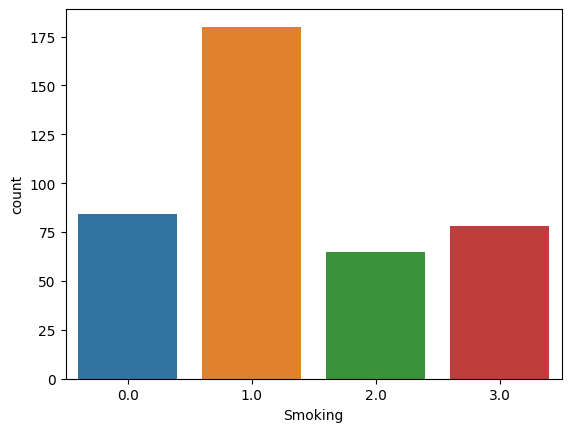

In [74]:
dfmale['Smoking'] = pd.Categorical(dfmale[('Smoking')])
sns.countplot(x= 'Smoking',data=dfmale)
plt.show()

C:\Users\slopezgu\AppData\Local\Temp\ipykernel_13472\3964119544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFem['Smoking'] = pd.Categorical(dfFem[('Smoking')])


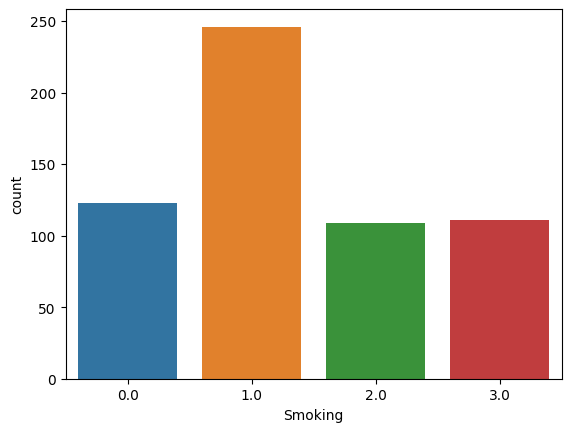

In [76]:
dfFem['Smoking'] = pd.Categorical(dfFem[('Smoking')])
sns.countplot(x= 'Smoking',data=dfFem)
plt.show()

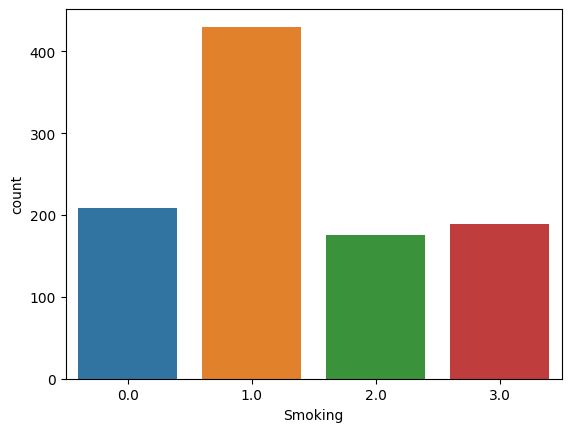

In [77]:
df['Smoking'] = pd.Categorical(df[('Smoking')])
sns.countplot(x= 'Smoking',data=df)
plt.show()

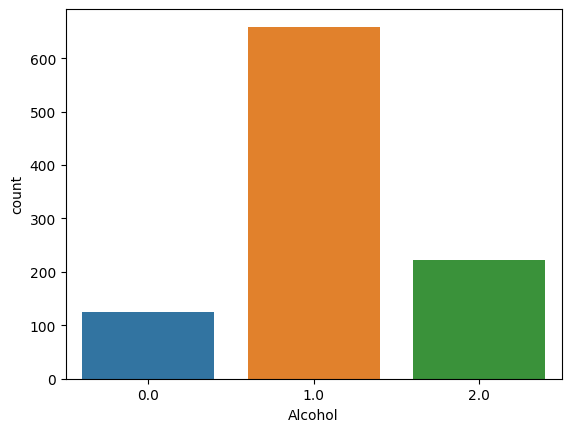

In [78]:
df['Alcohol'] = pd.Categorical(df[('Alcohol')])
sns.countplot(x= 'Alcohol',data=df)
plt.show()

Convertimos las categorías en valores numéricos

In [15]:
df['Smoking'].replace(['never smoked', 'tried smoking', 'former smoker', 'current smoker'],
                        [0, 1, 2, 3], inplace=True)
df['Alcohol'].replace(['never', 'social drinker', 'drink a lot'],
                        [0, 1, 2], inplace=True)
df['Smoking'] = pd.to_numeric(df[('Smoking')])
df['Alcohol'] = pd.to_numeric(df[('Alcohol')])

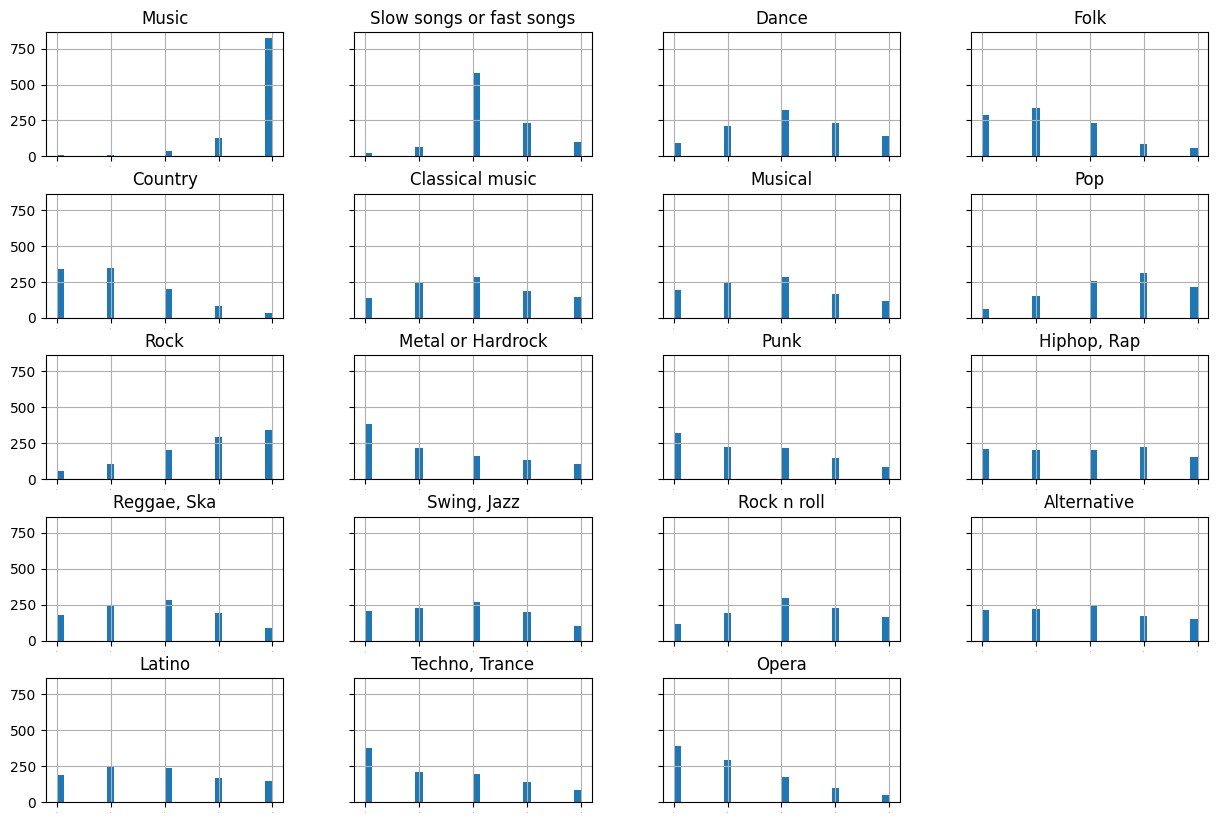

In [16]:
df[music_col].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
plt.show()

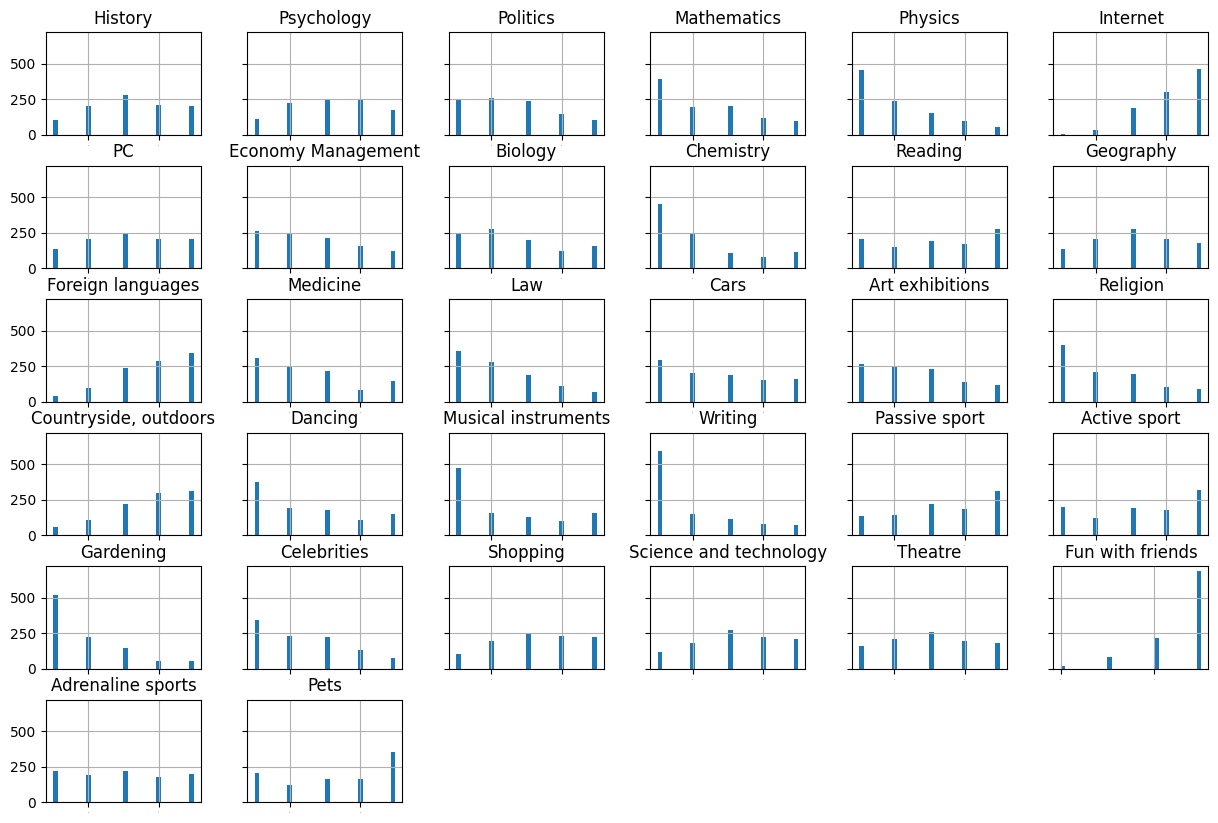

In [17]:
df[hobbies_col].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
plt.show()

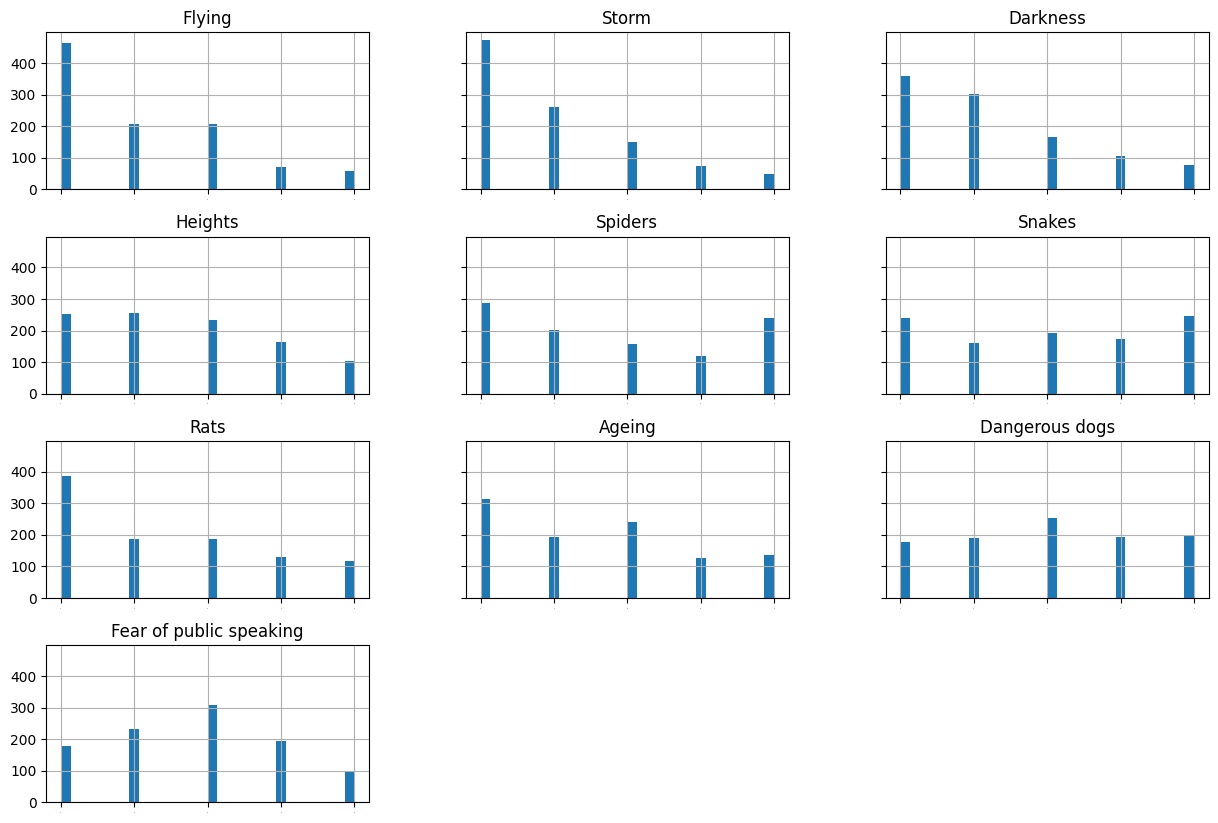

In [18]:
df[phobias_col].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
plt.show()

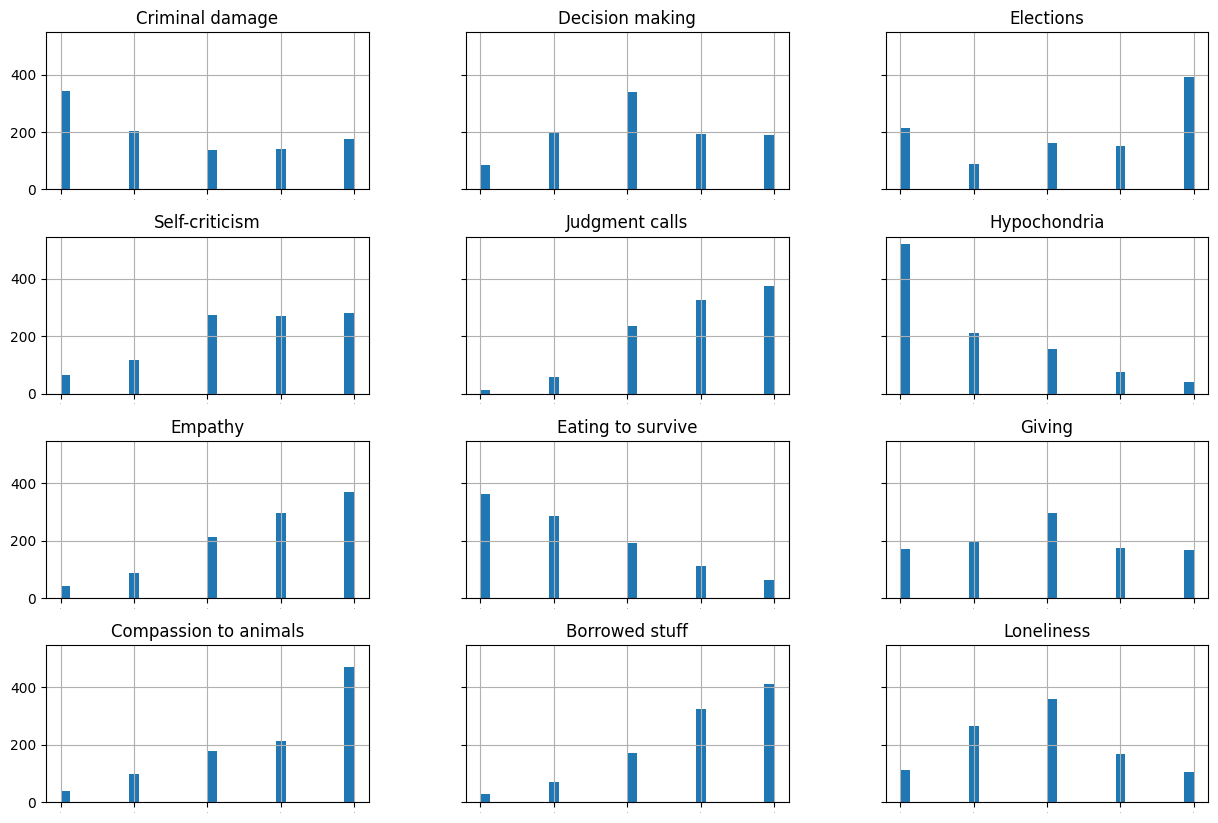

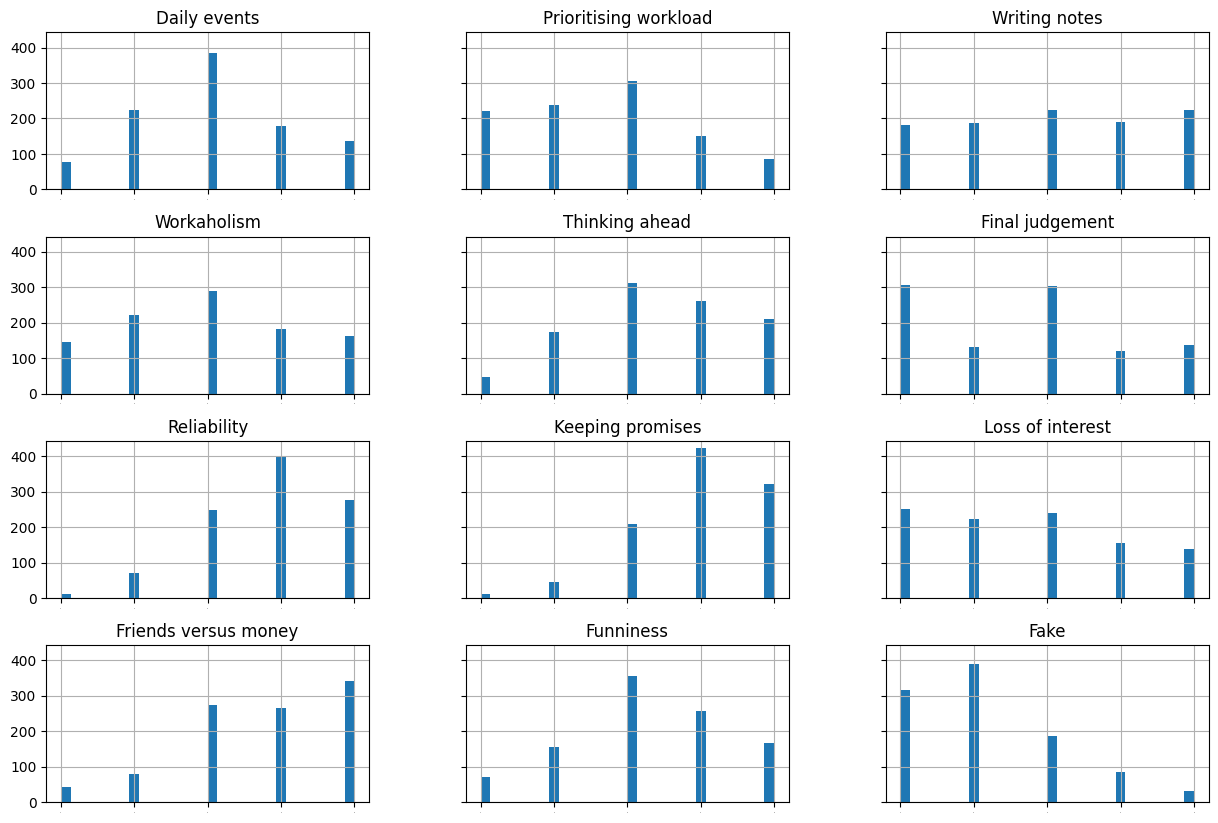

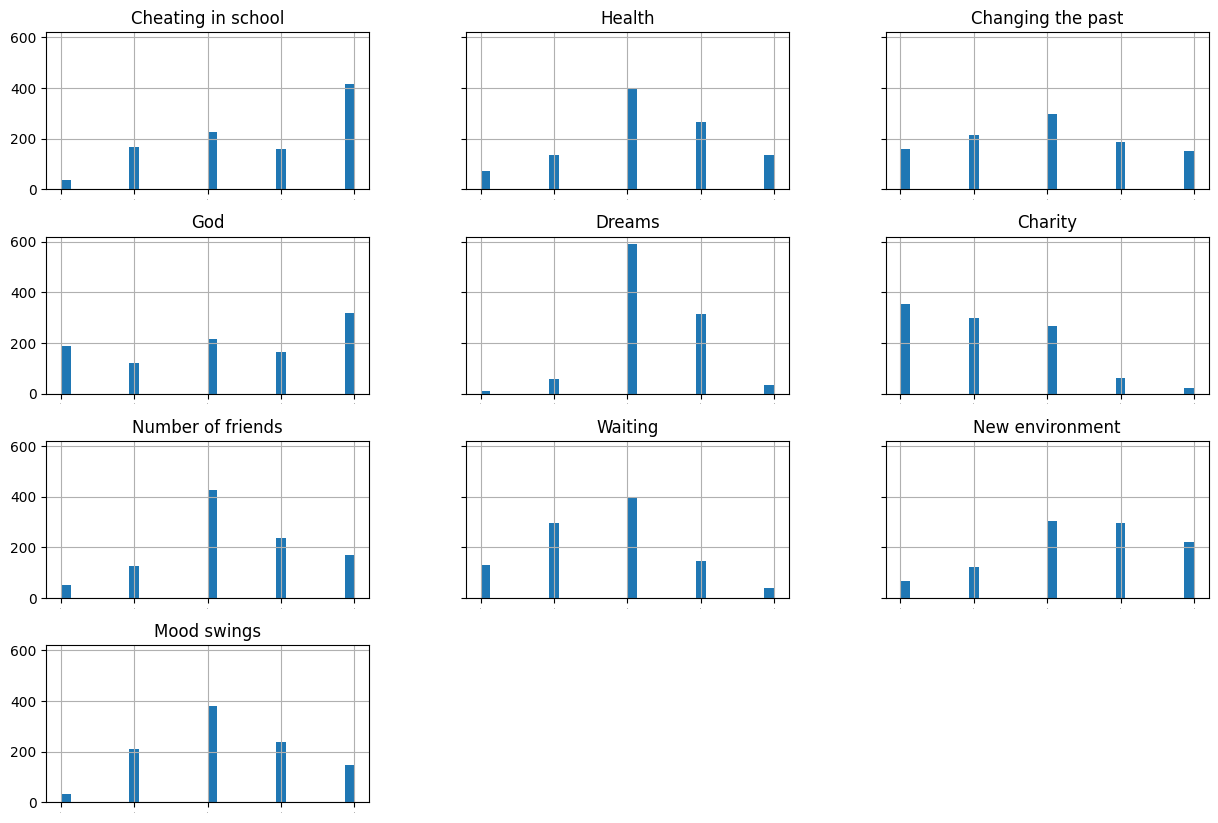

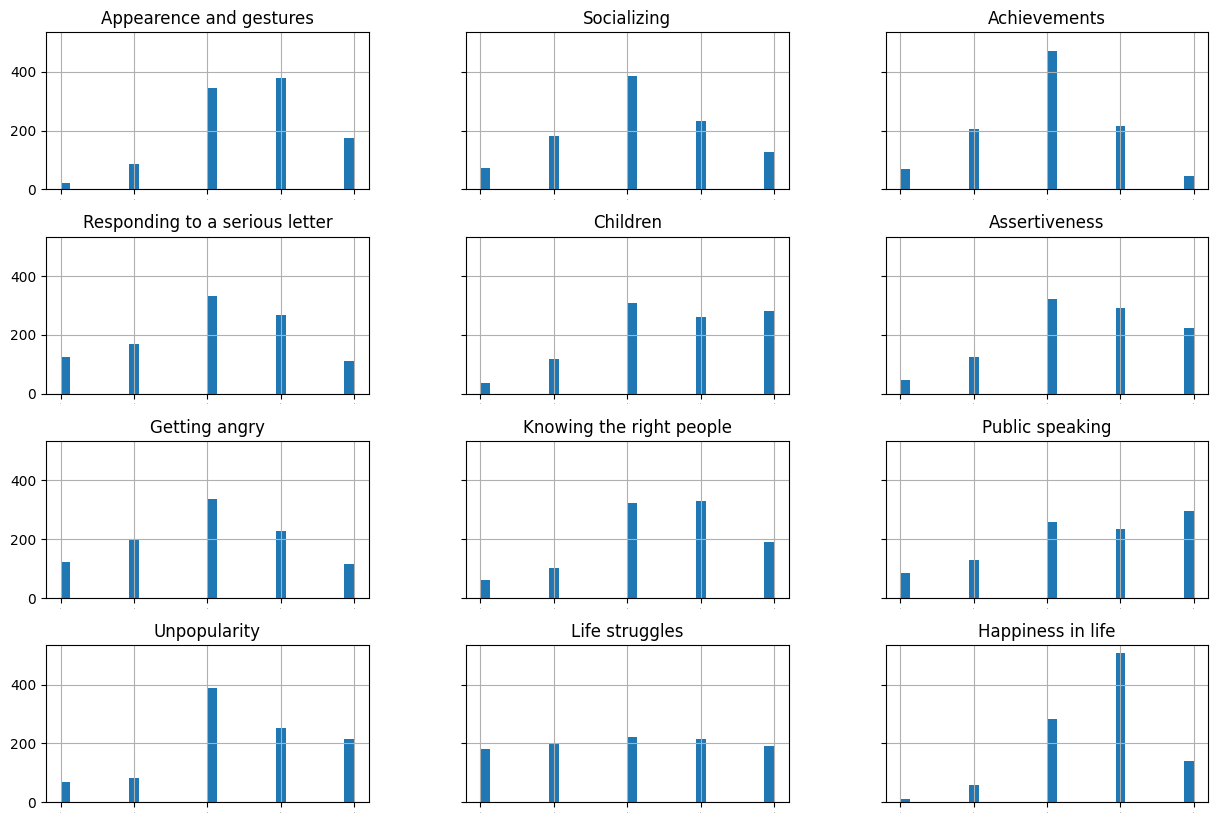

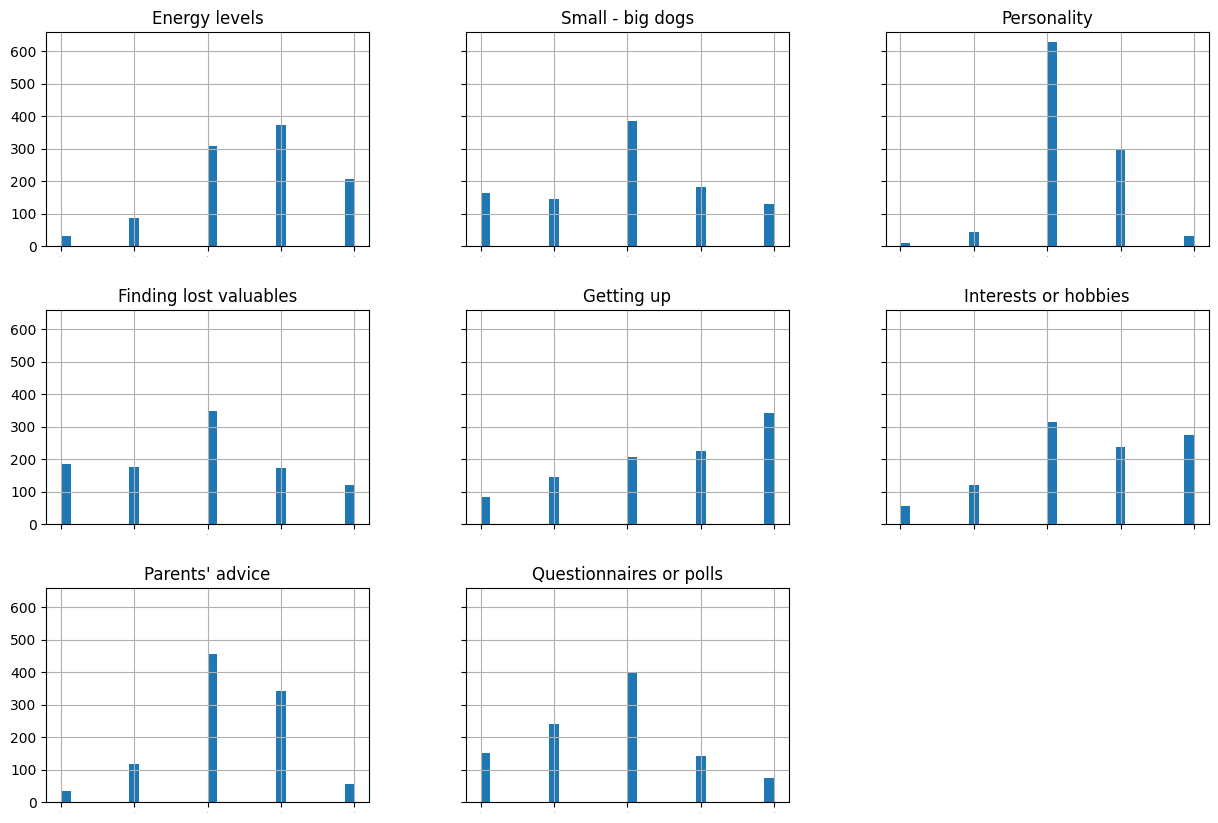

In [19]:
df[personality_col1].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
df[personality_col2].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
df[personality_col3].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
df[personality_col4].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
df[personality_col5].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
plt.show()

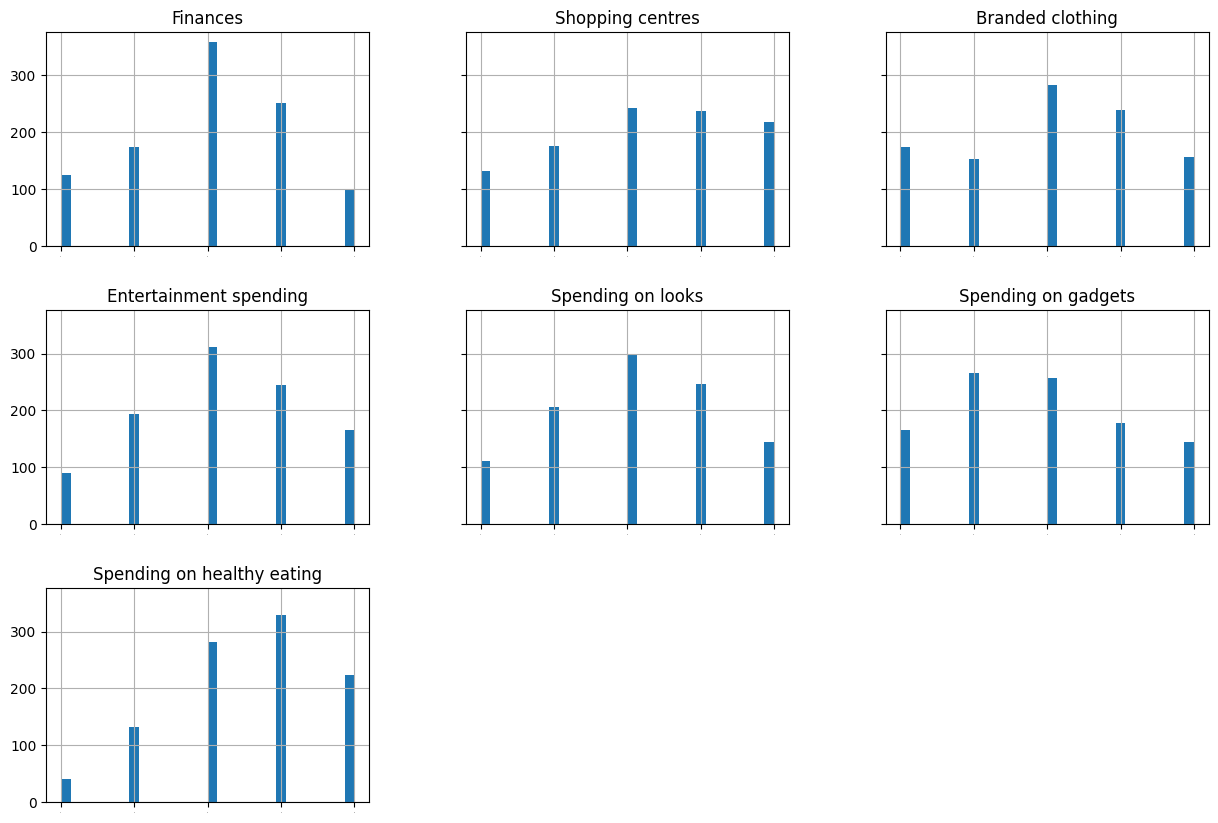

In [20]:
df[spending_col].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)

plt.show() 

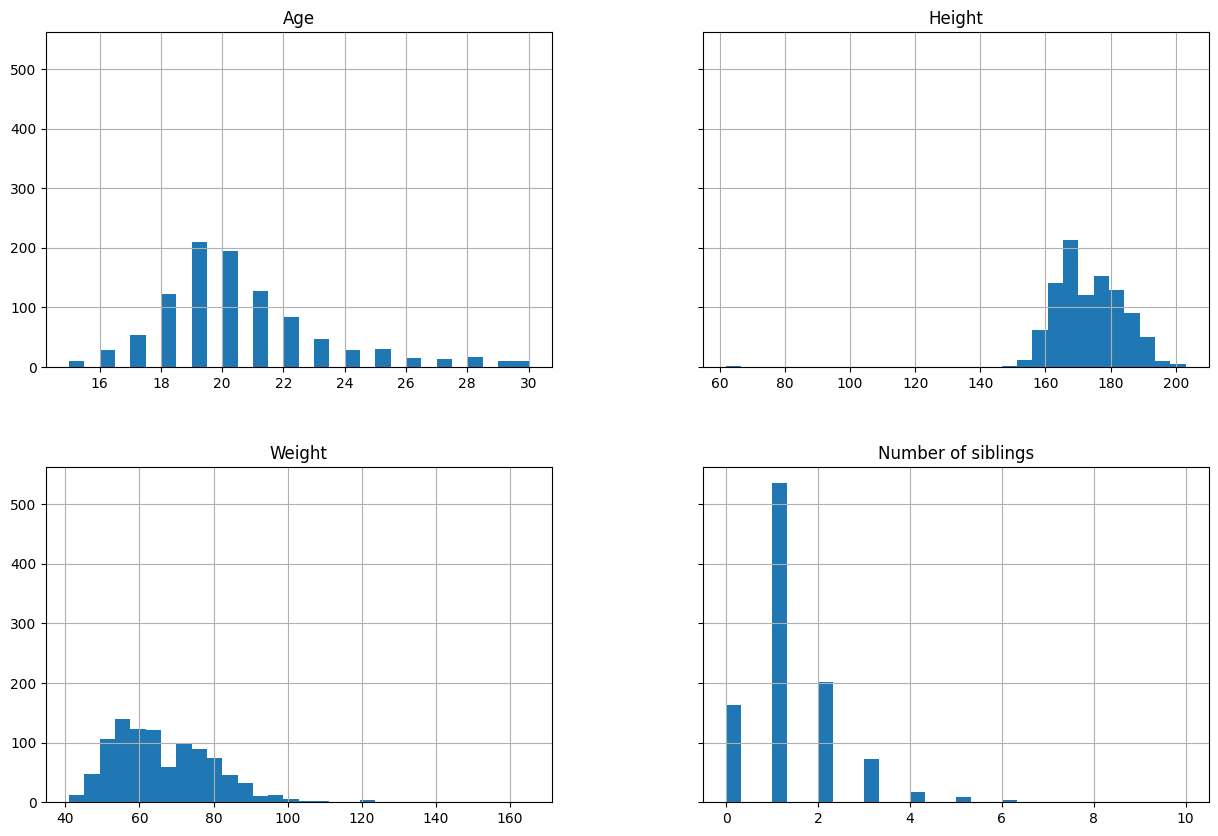

In [21]:
df[demo_col].hist(bins=30, sharey=True, figsize=(15, 10))

plt.show() 